In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import keras

np.random.seed(2)

In [3]:
data = pd.read_csv('creditcard.csv')

# Data Exploration

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Pre-Processing

In [5]:
from sklearn.preprocessing import StandardScaler
data['normalizedAmount'] = StandardScaler().fit_transform(
    data['Amount'].values.reshape(-1,1)
)
data = data.drop(['Amount'], axis = 1)

In [7]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [8]:
data = data.drop(['Time'], axis = 1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [9]:
x = data.iloc[ : , data.columns != 'Class']
y = data.iloc[ : , data.columns == 'Class']

In [10]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [12]:
x_train.shape

(199364, 29)

In [13]:
y_train.shape

(199364, 1)

In [14]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Deep Neural Network

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [16]:
model = Sequential([
    Dense(units = 16, input_dim = 29, activation = 'relu'),
    Dense(units = 24, activation = 'relu'),
    Dropout(0.5),
    Dense(20, activation = 'relu'),
    Dense(24, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
______________________________________________________

# Training

In [18]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, batch_size = 15, epochs = 5)

Epoch 1/5
13291/13291 [==============================] - 11s 805us/step - loss: 0.0253 - accuracy: 0.9969
Epoch 2/5
13291/13291 [==============================] - 10s 773us/step - loss: 0.0040 - accuracy: 0.9993
Epoch 3/5
13291/13291 [==============================] - 10s 772us/step - loss: 0.0033 - accuracy: 0.9993
Epoch 4/5
13291/13291 [==============================] - 10s 750us/step - loss: 0.0034 - accuracy: 0.9994
Epoch 5/5
13291/13291 [==============================] - 10s 771us/step - loss: 0.0031 - accuracy: 0.9994


In [19]:
score = model.evaluate(x_test, y_test)

2671/2671 [==============================] - 2s 610us/step - loss: 0.0034 - accuracy: 0.9994


In [20]:
print(score)

[0.003378580091521144, 0.9993796944618225]


In [21]:
y_pred = model.predict(x_test)
y_test = pd.DataFrame(y_test)

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred.round())
print(cm)

[[85278    18]
 [   35   112]]


<AxesSubplot:>

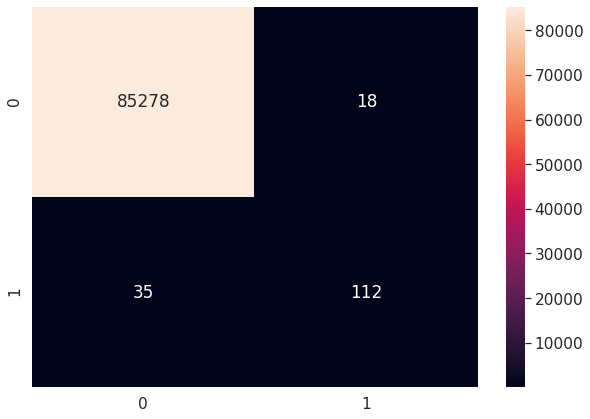

In [23]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')

<AxesSubplot:>

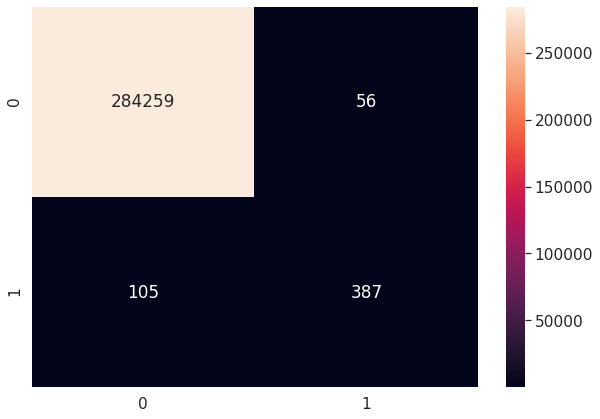

In [24]:
y_pred = model.predict(x)
y_expected = pd.DataFrame(y)
cm = confusion_matrix(y_expected, y_pred.round())

df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')

# Undersampling 

In [27]:
fraud_indices = np.array(data[data.Class == 1].index)
num_rec_fraud = len(fraud_indices)
print(num_rec_fraud)

492


In [29]:
normal_indices = data[data.Class == 0].index

In [30]:
random_normal_indices = np.random.choice(normal_indices, num_rec_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)
print(len(random_normal_indices))

492


In [31]:
under_sample_indices = np.concatenate([fraud_indices, random_normal_indices])
print(len(under_sample_indices))

984


In [35]:
under_sam_data = data.iloc[under_sample_indices, : ]
x_undersample = under_sam_data.iloc[ : , data.columns != 'Class']
y_undersample = under_sam_data.iloc[ : , data.columns == 'Class']

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x_undersample, y_undersample, test_size = 0.3)

In [42]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
______________________________________________________

In [44]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, batch_size = 15, epochs = 5)

Epoch 1/5
46/46 [==============================] - 0s 777us/step - loss: 0.1286 - accuracy: 0.9559
Epoch 2/5
46/46 [==============================] - 0s 785us/step - loss: 0.1121 - accuracy: 0.9552
Epoch 3/5
46/46 [==============================] - 0s 813us/step - loss: 0.0950 - accuracy: 0.9548
Epoch 4/5
46/46 [==============================] - 0s 795us/step - loss: 0.0910 - accuracy: 0.9646
Epoch 5/5
46/46 [==============================] - 0s 817us/step - loss: 0.0999 - accuracy: 0.9717


<AxesSubplot:>

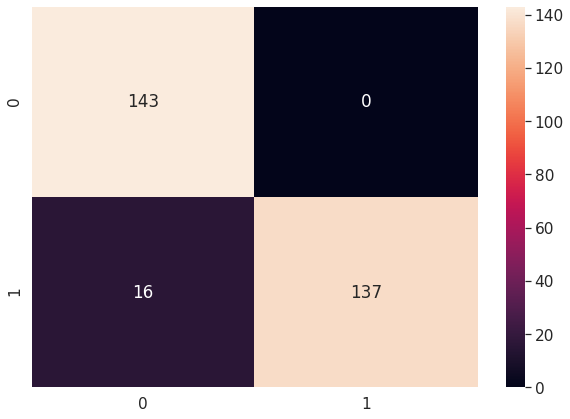

In [45]:
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred.round())

df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale = 1.4)
sns.heatmap(df_cm, annot = True, fmt = 'g')

<AxesSubplot:>

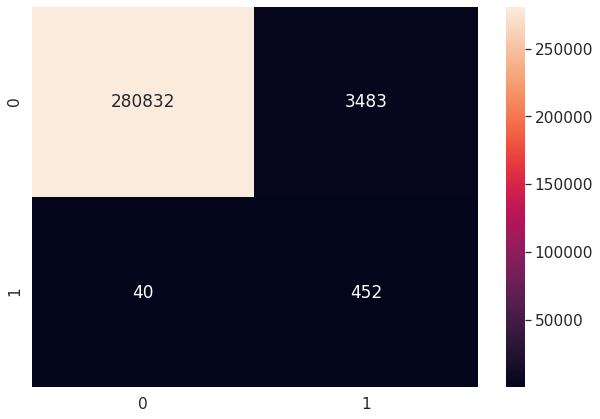

In [47]:
y_pred = model.predict(x)
cm = confusion_matrix(y, y_pred.round())

df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale = 1.4)
sns.heatmap(df_cm, annot = True, fmt = 'g')

# SMOTE

In [48]:
%%bash
pip install -U imbalanced-learn

In [51]:
from imblearn.over_sampling import SMOTE
x_resample, y_resample = SMOTE().fit_sample(x, y.values.ravel())

In [53]:
x_resample = pd.DataFrame(x_resample)
y_resample = pd.DataFrame(y_resample)

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x_resample, y_resample, test_size = 0.3)

In [55]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [56]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, batch_size = 15, epochs = 5)

Epoch 1/5
26537/26537 [==============================] - 22s 810us/step - loss: 0.0475 - accuracy: 0.9831
Epoch 2/5
26537/26537 [==============================] - 24s 921us/step - loss: 0.0140 - accuracy: 0.9962
Epoch 3/5
26537/26537 [==============================] - 25s 954us/step - loss: 0.0121 - accuracy: 0.9968
Epoch 4/5
26537/26537 [==============================] - 28s 1ms/step - loss: 0.0096 - accuracy: 0.9975
Epoch 5/5
26537/26537 [==============================] - 30s 1ms/step - loss: 0.0085 - accuracy: 0.9979


<AxesSubplot:>

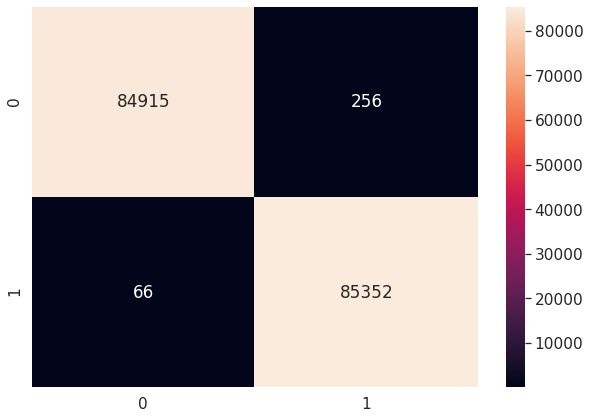

In [57]:
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred.round())

df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale = 1.4)
sns.heatmap(df_cm, annot = True, fmt = 'g')

<AxesSubplot:>

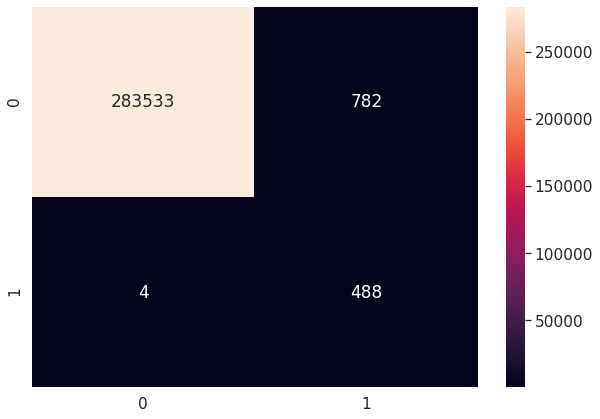

In [58]:
y_pred = model.predict(x)
cm = confusion_matrix(y, y_pred.round())

df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale = 1.4)
sns.heatmap(df_cm, annot = True, fmt = 'g')